# Binning distributions for SardiNIA and inCHIANTI

This notebook contains code for binning and visualizing the binned distributions for each baseline and follow-up waves of the SardiNIA and inCHIANTI datasets. These were determined heuristically (please refer to corresponding Misc. notebook for more details.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.stats import pearsonr
import pandas as pd
import glob as gb
import csv

In [2]:
'''
Data reading functions copied from AgeRatesTurnkey.py file
'''

def read_data_updated2(file_name, what_to_prioritize):
    x = pd.read_csv(file_name,sep='\t', na_values=[])
    x = x.dropna(axis=1, how='all')
    x = x.dropna(how='all')

    threshold_num = 0.05
    if what_to_prioritize is 'features':
        for i in range (47):
            x = x.dropna(thresh=(x.shape[1]*threshold_num))
            x = x.dropna(axis=1, thresh=(x.shape[0]*threshold_num))
            threshold_num += 0.02
        x = x.dropna(how='any')
    elif what_to_prioritize is 'samples':
        for i in range (47):
            x = x.dropna(axis=1, thresh=(x.shape[0]*threshold_num))
            x = x.dropna(thresh=(x.shape[1]*threshold_num))
            threshold_num += 0.02
        x = x.dropna(axis=1, how='any')
    else:
        return("Need to specify what to prioritize: 'features' or 'samples'")
    x.to_csv("trimmedFile", sep='\t')
    return (x)


def read_common_cardio_features(file_name):
    print ("Reading common clinical features...")
    
    common_cardio_col_norm = [
        "id_individual", # Needed to track samples
        "Age", # target variable
        "labsRBC",   #
        "labsHB", # 
        "labsMCV",    # 
        "labsMCH",     # 
        "labsWBC",     # 
        "labsPercNE",      # 
        "labsPercLY",  # 
        "labsPercMO",   # 
        "labsPercEO",    # 
        "labsPercBA",     #
        "V1_V5",
        "labsPLT",
        "labsHBF",
        "labsHBA2",
        "labsG6PD",
        "labsGlicemia",
        "labsInsulinemia",
        "labsAzotemia",
        "labsALT",
        "labsAST",
        "labsGammaGT",
        "labsFibrinogeno",
        "labsSideremia",
        "labsTransferrina",
        "labsBilirubinad",
        "labsBilirubinat",
        "labsAcidourico",
        "labsSodiemia",
        "labsPotassiemia",
        "labsVES",
        "labsPCR",
        "labsTSH",
        "labsFt4",
        "assayAdip",
        "assayLeptin",
        "assayMCP1",
        "assayIL6",
        "labsMCHC",
        "labsHtc",
        "labsMO_COUNT",
        "labsEO_COUNT",
        "labsBA_COUNT",
        "labsLY_COUNT",
        "labsNE_COUNT",
        "labsCreatinina",
        "labsColesterolo",
        "labsHDL",
        "labsTrigliceridi",
        "exmHeight",
        "exmWeight",
        "exmWaist",
        "exmHip",
        "exmBMI",
        "exmBPsys_jbs",
        "exmBPdia_jbs",
        "pwvQual",
        "pwv",
        "vasPSV",
        "vasEDV",
        "vasIP",
        "vasSDratio",
        "vasAT",
        "vasvti",
        "vasSysDiam",
        "vasDiaDiam",
        "vasIMT"
    ]
    
    x = pd.read_csv(file_name,sep='\t', na_values=[])
    x = x.dropna(axis=1, how='all')
    x = x.dropna(how='all')

    for feature_name in x.columns:
        if feature_name not in common_cardio_col_norm:
            x = x.drop(feature_name, axis=1)

    threshold_num = 0.05
    for i in range (47):
        x = x.dropna(thresh=(x.shape[1]*threshold_num))
        x = x.dropna(axis=1, thresh=(x.shape[0]*threshold_num))
        threshold_num += 0.02
    x = x.dropna(how='any')

    return (x)

def convert_data(df):
    data = df.as_matrix()
    col_names = df.columns.values
    return (data, col_names, df.columns.get_loc("Age"), df.columns.get_loc("id_individual"))

def bin_data(start, end, size, data_matrix, age_col):
    bins = range (start, end+size, size)
    digitized = np.digitize(age_col, bins)

    views=[]
    for i in range (1,len(bins)):
        views.append (data_matrix[digitized == i,:])
    class_vals = [x+(size/2.0) for x in range(start, end, size)]
    return (views, class_vals)

def plotBins (data_file_path, title, save_name, size, start='min', end='max', feature_type='normal'):
    colors = ['#324851', '#86AC41', '#34675C', '#7DA3A1']
    if feature_type is 'normal':
        df = read_data_updated2 (data_file_path,'features')
    elif feature_type is 'common_cardio':
        df = read_common_cardio_features(data_file_path)
    data_matrix, col_names, age_col_idx, id_col_idx = convert_data (df)
    age_col = data_matrix[:,age_col_idx]
    
    pl.figure()
    if start == 'min' and end == 'max':
        pl.hist(age_col, bins=np.arange(min(age_col), max(age_col)+size, size), fc=(0.28,0.37,0.35,0.5))
    else:
        a,b,c = pl.hist(age_col, bins=np.arange(start, end+size, size), fc=(0.28,0.37,0.35,0.5))
    #print (a)
    pl.xlabel ('Chronological Age (years)', fontsize=14)
    pl.ylabel ('Number of individuals', fontsize=14)
    pl.title (title)
    pl.tick_params(axis='both', which='major', labelsize=12)
    pl.tick_params(axis='both', which='minor', labelsize=12)
    pl.savefig('./Figures/'+save_name, dpi=800)
    pl.show()

## SardiNIA

C:\Users\edsun\Anaconda3\lib\site-packages\ipykernel\__main__.py:117: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


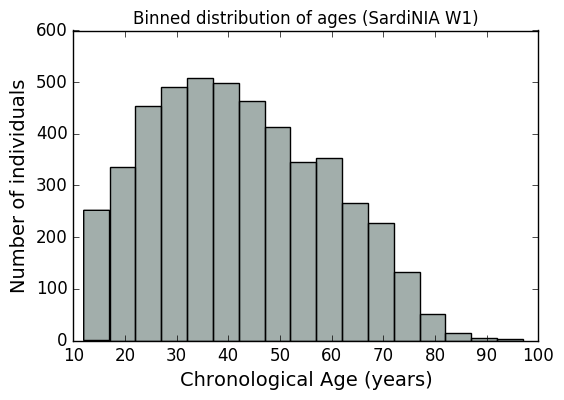

In [3]:
plotBins('./RawData/2013-12-18-Sardinia-CleanUp-Data-Wave1.tsv', 'Binned distribution of ages (SardiNIA W1)', 'w1_bins', 5, start=12, end=97)

C:\Users\edsun\Anaconda3\lib\site-packages\ipykernel\__main__.py:117: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


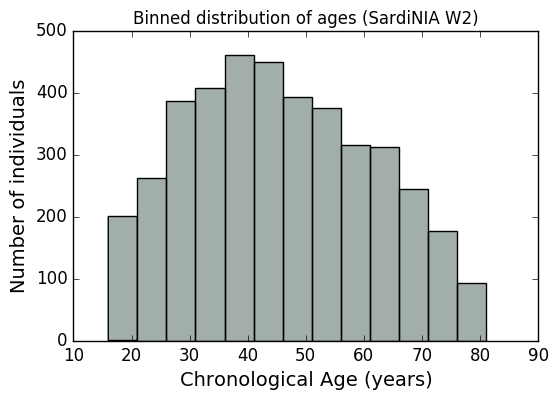

In [4]:
plotBins('./RawData/2013-12-18-Sardinia-CleanUp-Data-Wave2.tsv', 'Binned distribution of ages (SardiNIA W2)', 'w2_bins', 5, start=16, end=81)

C:\Users\edsun\Anaconda3\lib\site-packages\ipykernel\__main__.py:117: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


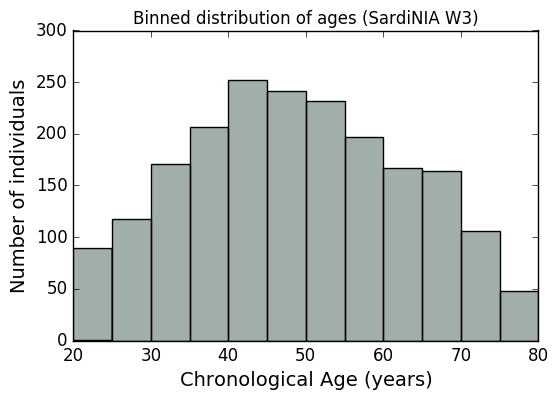

In [5]:
plotBins('./RawData/2013-12-18-Sardinia-CleanUp-Data-Wave3.tsv', 'Binned distribution of ages (SardiNIA W3)', 'w3_bins', 5, start=20, end=80)

C:\Users\edsun\Anaconda3\lib\site-packages\ipykernel\__main__.py:117: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


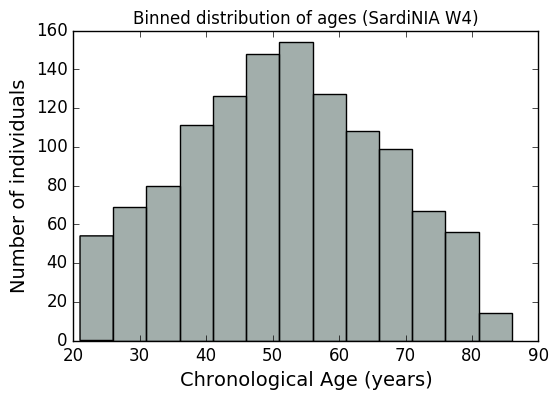

In [6]:
plotBins('./RawData/2013-12-18-Sardinia-CleanUp-Data-Wave4.tsv', 'Binned distribution of ages (SardiNIA W4)', 'w4_bins', 5, start=21, end=86)

## SardiNIA (common and cardiovascular featured model)

Reading common clinical features...


C:\Users\edsun\Anaconda3\lib\site-packages\ipykernel\__main__.py:117: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


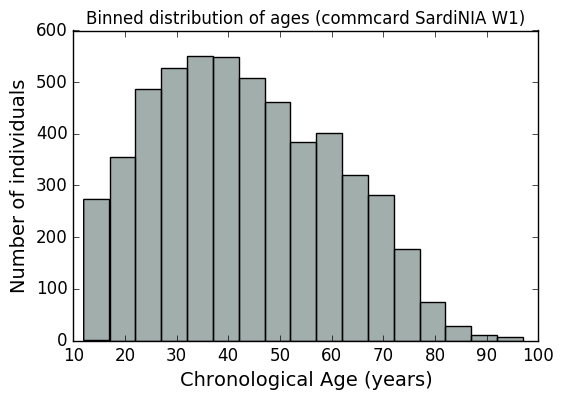

Reading common clinical features...


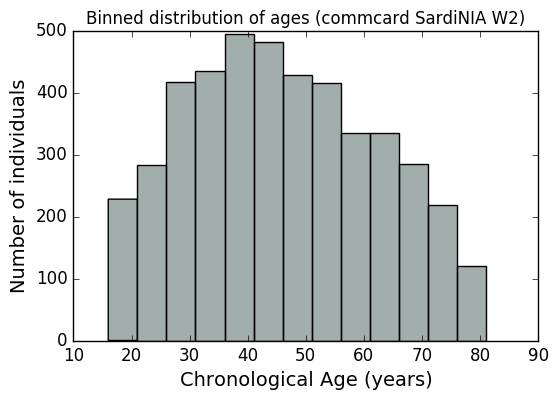

Reading common clinical features...


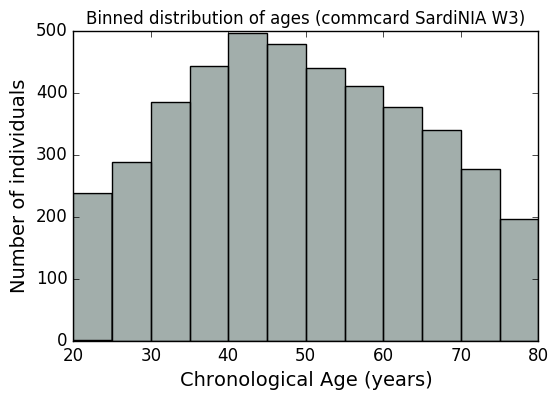

Reading common clinical features...


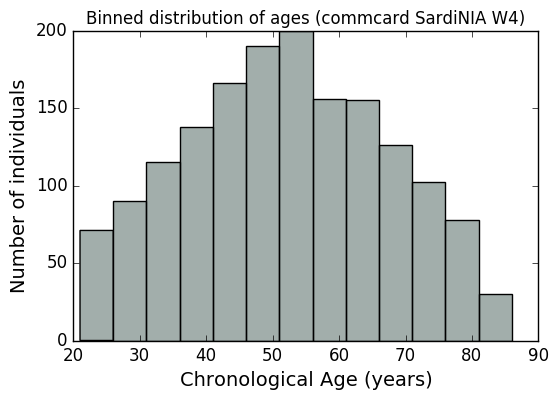

In [7]:
plotBins('./RawData/2013-12-18-Sardinia-CleanUp-Data-Wave1.tsv', 'Binned distribution of ages (commcard SardiNIA W1)', 'w1_bins_commcard', 5, start=12, end=97, feature_type='common_cardio')
plotBins('./RawData/2013-12-18-Sardinia-CleanUp-Data-Wave2.tsv', 'Binned distribution of ages (commcard SardiNIA W2)', 'w2_bins_commcard', 5, start=16, end=81, feature_type='common_cardio')
plotBins('./RawData/2013-12-18-Sardinia-CleanUp-Data-Wave3.tsv', 'Binned distribution of ages (commcard SardiNIA W3)', 'w3_bins_commcard', 5, start=20, end=80, feature_type='common_cardio')
plotBins('./RawData/2013-12-18-Sardinia-CleanUp-Data-Wave4.tsv', 'Binned distribution of ages (commcard SardiNIA W4)', 'w4_bins_commcard', 5, start=21, end=86, feature_type='common_cardio')

## inCHIANTI

C:\Users\edsun\Anaconda3\lib\site-packages\ipykernel\__main__.py:117: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


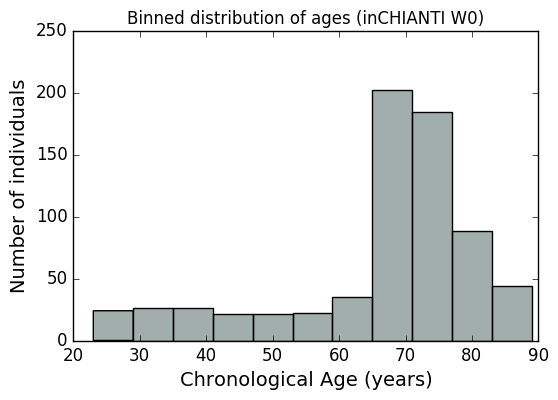

In [8]:
plotBins('./RawData/inChiantiAll-w0.tsv', 'Binned distribution of ages (inCHIANTI W0)', 'inCH_w0_bins', 6, start=23, end=89)

C:\Users\edsun\Anaconda3\lib\site-packages\ipykernel\__main__.py:117: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


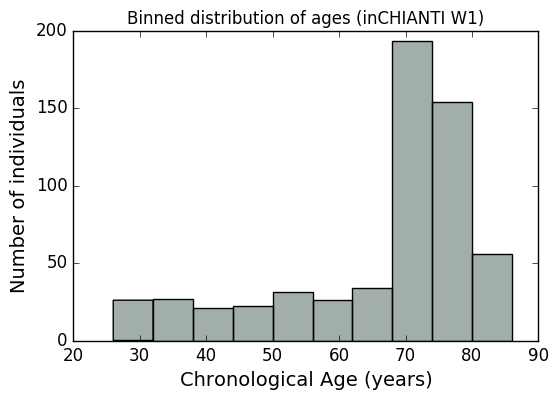

In [9]:
plotBins('./RawData/inChiantiAll-w1.tsv', 'Binned distribution of ages (inCHIANTI W1)', 'inCH_w1_bins', 6, start=26, end=86)

C:\Users\edsun\Anaconda3\lib\site-packages\ipykernel\__main__.py:117: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


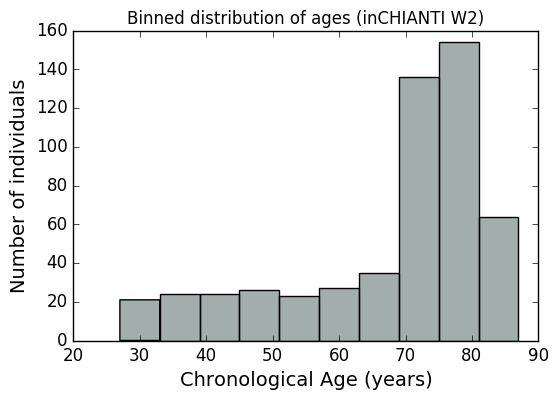

In [10]:
plotBins('./RawData/inChiantiAll-w2.tsv', 'Binned distribution of ages (inCHIANTI W2)', 'inCH_w2_bins', 6, start=27, end=87)

C:\Users\edsun\Anaconda3\lib\site-packages\ipykernel\__main__.py:117: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


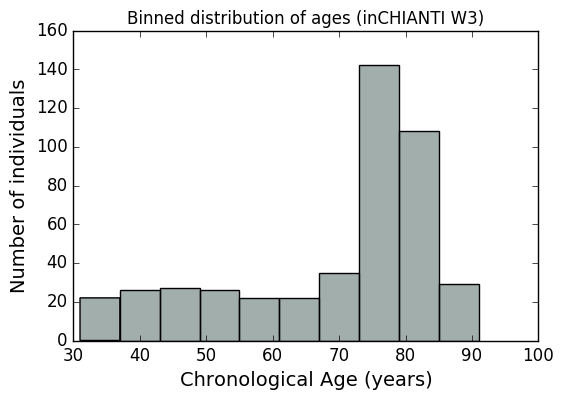

In [11]:
plotBins('./RawData/inChiantiAll-w3.tsv', 'Binned distribution of ages (inCHIANTI W3)', 'inCH_w3_bins', 6, start=31, end=91)